In [2]:
import jax
import jax.numpy as jnp
from tqdm import tqdm
import netket as nk
# import netket_pro as nkp
import matplotlib.pyplot as plt
import os

In [3]:
os.environ["CUDA_VISIBLE_DEVICES"] = "2"

In [4]:
from grad_sample.utils.plotting_setup import *

In [18]:
def plot_delta_dep(alpha, err_max=8):
    path1 = f"/scratch/.amisery/grad_sample/ising_1.0/L3/RBM/alpha{alpha}/saved_10_10/out_analysis_oneshot_curved_dist_deltadep.npz"

    delta_dict = jnp.load(path1, allow_pickle=True)["arr_0"].item()

    deltas = list(delta_dict.keys())[1:]

    n_delta = len(deltas)
    # n_err = len(list(delta_dict[deltas[0]].keys()))
    n_err = err_max + 1
    fig, axes = plt.subplots(1, n_err-1, figsize=(20,3))
    for j in range(1,n_err):
        for d in deltas: 
            out_dict = delta_dict[d]
            keys = list(out_dict.keys())
            # keys  = jnp.argwhere(keys.type == int)
            axes[j-1].plot(out_dict[keys[j]]["infid_ev"], label = r"$\alpha = %d, \delta=%.2e$"%(alpha,d))
            axes[j-1].set_yscale("log")
            axes[j-1].set_title(r"$\sigma_{rel} \approx 10^{-%d}$"%j, fontsize=15)

    handles, labels = axes[0].get_legend_handles_labels()
    fig.legend(handles, labels, bbox_to_anchor=(1.01,0.9))
    fig.suptitle(r"Robustness of $\frac{FS(\ket{\psi_{\theta+\delta \dot{\theta}}}, (I -\delta H) \ket{\psi_\theta})}{FS(\ket{\psi_{\theta}}, (I -\delta H) \ket{\psi_\theta})}$ to sample pruning, several deltas", y=1.3, fontsize=23)
    plt.show()
    plt.clf()

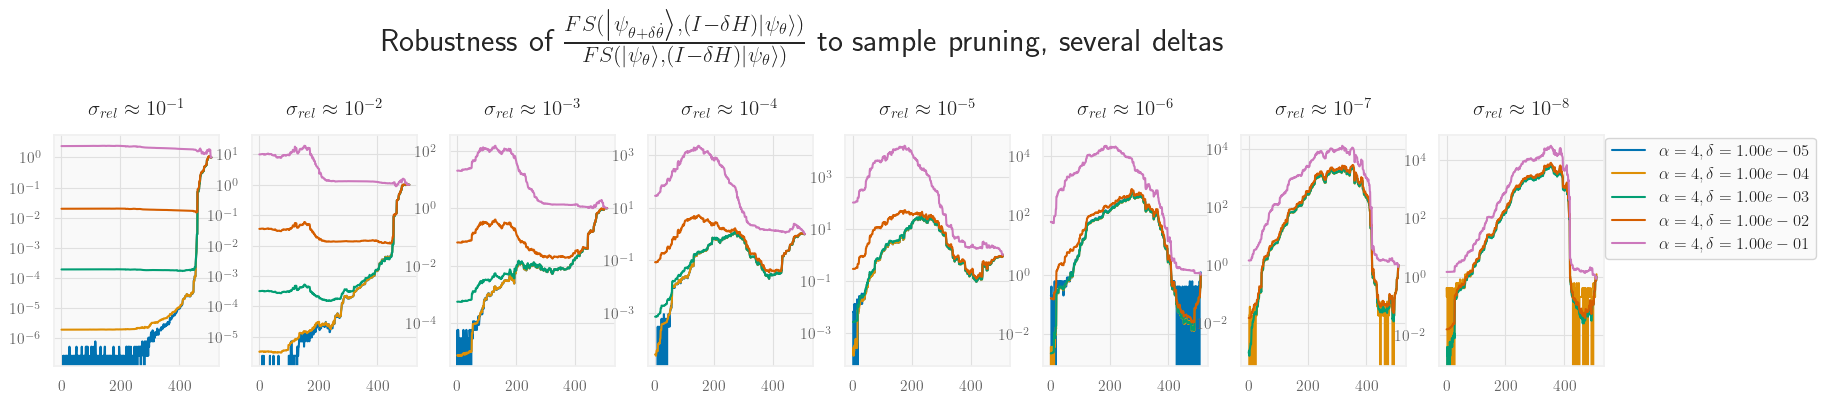

<Figure size 1000x600 with 0 Axes>

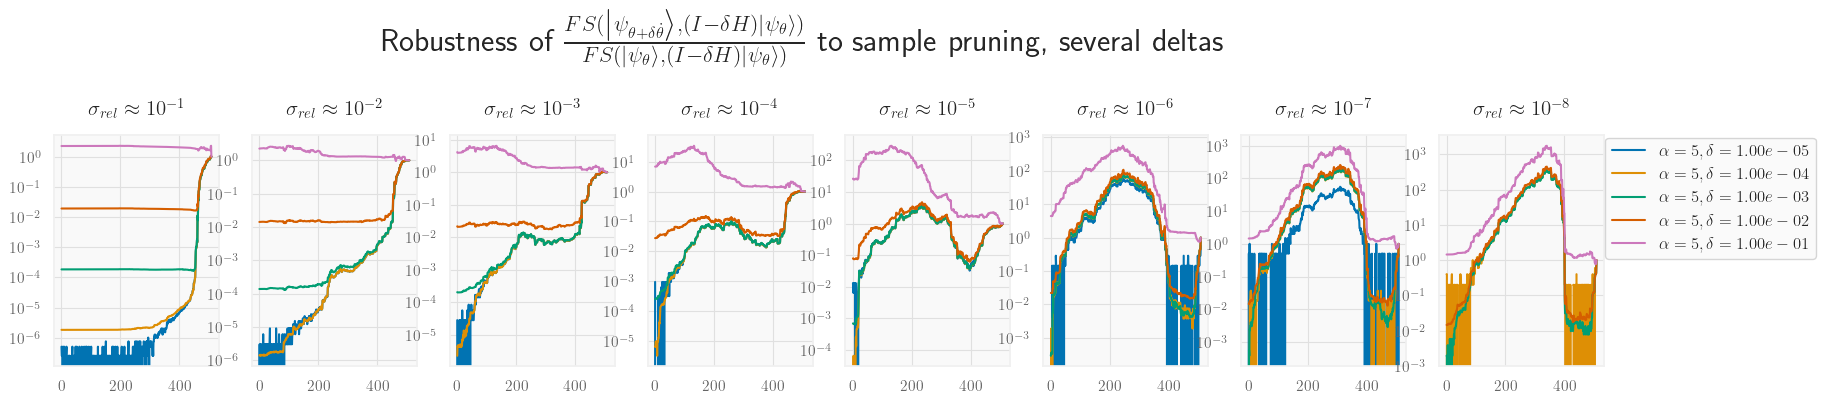

<Figure size 1000x600 with 0 Axes>

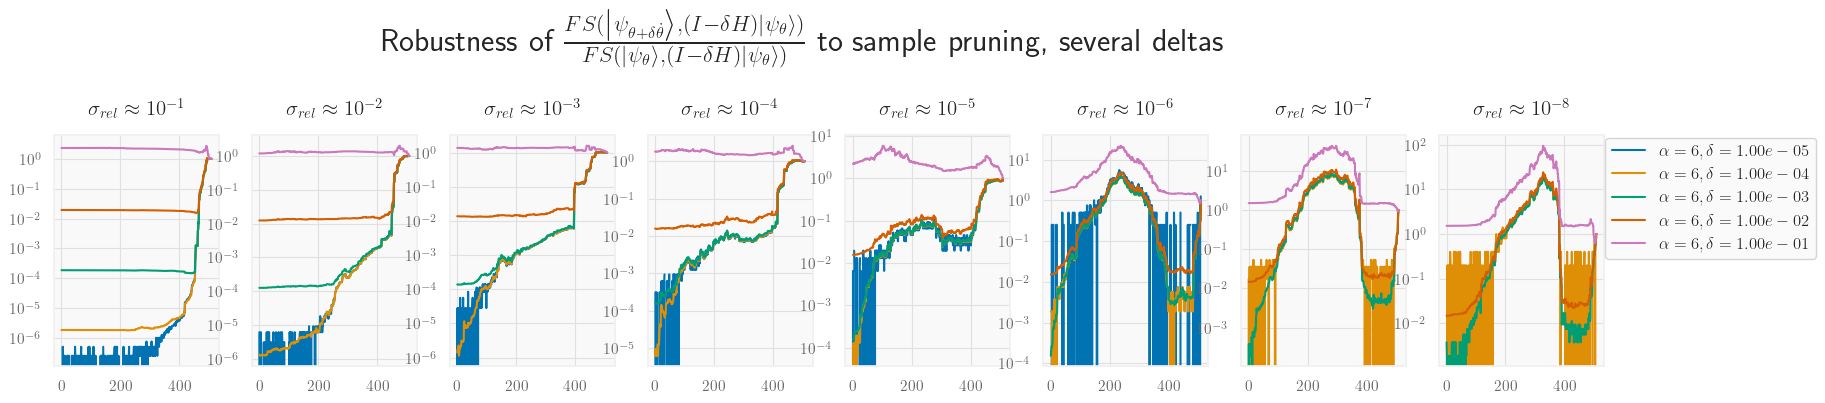

<Figure size 1000x600 with 0 Axes>

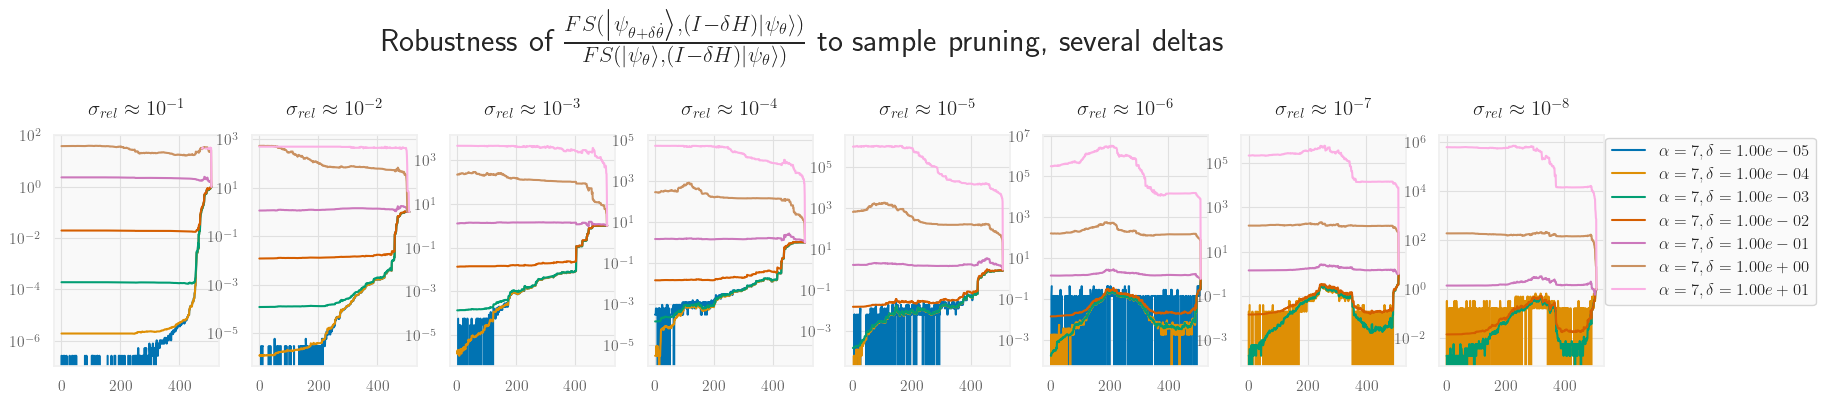

<Figure size 1000x600 with 0 Axes>

In [19]:
for alpha in [4,5,6,7]:
    plot_delta_dep(alpha)